### Employee Retention Survey (2023) - Relationship Between Employee Age and Employee Rentention at Airtel Zambia

This analysis reproduces the results obtained by Mwila (2023) in a study on employee turnover and retention in the telecommunications services sector in Zambia. The data used was from an online survey conducted by Mwila (2023) involving employees at Airtel Zambia. This analysis focuses on age and employee retention. 

#### Survey Research Questions
To reproduce the results obtained by the Mwila (2023). The goal of this data analysis was to answer the following questions:

1. What factors contribute to high employee turnover at Airtel Networks Zambia?
2. Do policies impact the reduction of staff turnover and improve performance at Airtel Networks?
3. What are the differences in turnover rates among various age groups of employees at Airtel Networks?? 

##### Libraries and Packages

In [1]:
# Import libraries

# For data manipulation
import pandas as pd
import numpy as np
import statsmodels.api as sm  # For regression
from scipy import stats

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For data encoding
from sklearn.preprocessing import LabelEncoder

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For tables
from tabulate import tabulate

# Runtime Warnings
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in log")

# Realiability test - Cronbach
import pingouin as pg

# Feedback
print("Successful.")

Successful.


#### Raw Data

In [2]:
rawdf = pd.read_csv("survey_responses_raw.csv")

In [3]:
rawdf.head()

,Timestamp,Score,How long have you worked,What is your gender?,How old are you?,What is your highest qualification?,Does your company regularly measure employee satisfaction and engagement levels?,Do you believe inadequate compensation significantly contributes to employee turnover in the telecommunications industry?,What would make you stay for a longer period.,Has your organisation implemented specific programs or initiatives to address employee turnover in your telecommunications company?,I am proud to work for our company.,\nI am satisfied with the training provided for my current job.,I am satisfied with the amount of training offered for advancement.,Our company is concerned with the long-term welfare of the employees.,I feel secure that I can work for the company as long as I do a good job.,I feel I can voice my opinion without fear.,My immediate superior is technically incompetent.,My immediate superior is competent in human relations.,Employee policies of the company are administered the same in all departments laterally.,"I like my job, i.e. the work I do.",My immediate superior deals with employees' problems fairly.,The communication I receive from the company is timely.,Our company maintains salary levels that compare well to other companies in this area.,Our company maintains benefits that compare well to other companies in this area.,Company employee policies are properly and equally administered in my department.,I feel there is adequate opportunity for me to move to a better job within the company.,Please describe any specific factors contributing to employee turnover in the telecommunications services sector.,Can you provide examples of policies or initiatives your telecommunications company has implemented to address employee turnover and enhance retention?,"In your experience, have you observed any notable differences in turnover rates among different demographic groups? If yes, please provide some insights or examples.",What other strategies or measures should telecommunications service companies consider for improving employee retention and reduce turnover rates?
0,10/16/2023 13:25:50,NaN,> 5 years,Female,24 - 29 years,Bachelor's Degree,Yes,Yes,Improved work-life balance,Not sure,Neither agree nor disagree,Disagree,Strongly Disagree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Lackof proper leadership and mentorship,They introduced SIP and incentive to encourage...,Not really,Home/work life balance
1,10/16/2023 13:42:34,NaN,2 - 3 years,Male,30 - 35 years,Certificate/Diploma,Yes,Yes,Increased salary,"a) Yes,",Agree,Strongly agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Disagree,Agree,Agree,Agree,Strongly agree,Individual sales targets,NaN,NaN,NaN
2,10/16/2023 16:57:08,NaN,4 - 5 years,Female,24 - 29 years,Bachelor's Degree,Yes,Yes,Increased salary,"a) Yes,",Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Disagree,Strongly agree,NaN,NaN,NaN,NaN
3,10/17/2023 0:54:22,NaN,2 - 3 years,Female,36 - 40 years,Bachelor's Degree,Not sure,Not sure,Increased salary,No,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Low salaries and change of responsibilities of...,None,None,"Increase salaries, employ mature staff"
4,10/17/2023 10:36:45,NaN,2 - 3 years,Female,36 - 40 years,Bachelor's Degree,No,Yes,Improved work-life balance,No,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly agree,S

##### Observations:
- Timestamp and Score columns can be dropped.
- Columns need uniform names.
- Responses need to be coded.
- Last four questions are qualitative and need to be analysed separetly using themes.

### Data Cleaning

In [4]:
# Dropping Timestamp and Score columns and creating a new dataframe "data" to hold this new version of "rawdf".
data = rawdf.drop(['Timestamp', 'Score'], axis=1)

In [5]:
data.columns

Index(['How long have you worked  ', 'What is your gender?',
       'How old are you?', 'What is your highest qualification?',
       'Does your company regularly measure employee satisfaction and engagement levels?',
       'Do you believe inadequate compensation significantly contributes to employee turnover in the telecommunications industry?',
       'What would make you stay for a longer period.',
       'Has your organisation implemented specific programs or initiatives to address employee turnover in your telecommunications company?',
       'I am proud to work for our company.',
       '\nI am satisfied with the training provided for my current job.',
       'I am satisfied with the amount of training offered for advancement.',
       'Our company is concerned with the long-term welfare of the employees.',
       'I feel secure that I can work for the company as long as I do a good job.',
       'I feel I can voice my opinion without fear.',
       'My immediate superior is tec

In [6]:
# Quantitative data only - we drop the last four qualitative questions.
quantdf = data.drop(['Please describe any specific factors contributing   to employee turnover in the telecommunications services sector.',
       'Can you provide examples of policies or initiatives your telecommunications company has implemented to address employee turnover and enhance retention?',
       'In your experience, have you observed any notable differences in turnover rates among different demographic groups? If yes, please provide some insights or examples.',
       'What other strategies or measures should telecommunications service companies consider for improving employee retention and reduce turnover rates?'], axis=1)

In [7]:
quantdf.head()

,How long have you worked,What is your gender?,How old are you?,What is your highest qualification?,Does your company regularly measure employee satisfaction and engagement levels?,Do you believe inadequate compensation significantly contributes to employee turnover in the telecommunications industry?,What would make you stay for a longer period.,Has your organisation implemented specific programs or initiatives to address employee turnover in your telecommunications company?,I am proud to work for our company.,\nI am satisfied with the training provided for my current job.,I am satisfied with the amount of training offered for advancement.,Our company is concerned with the long-term welfare of the employees.,I feel secure that I can work for the company as long as I do a good job.,I feel I can voice my opinion without fear.,My immediate superior is technically incompetent.,My immediate superior is competent in human relations.,Employee policies of the company are administered the same in all departments laterally.,"I like my job, i.e. the work I do.",My immediate superior deals with employees' problems fairly.,The communication I receive from the company is timely.,Our company maintains salary levels that compare well to other companies in this area.,Our company maintains benefits that compare well to other companies in this area.,Company employee policies are properly and equally administered in my department.,I feel there is adequate opportunity for me to move to a better job within the company.
0,> 5 years,Female,24 - 29 years,Bachelor's Degree,Yes,Yes,Improved work-life balance,Not sure,Neither agree nor disagree,Disagree,Strongly Disagree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree
1,2 - 3 years,Male,30 - 35 years,Certificate/Diploma,Yes,Yes,Increased salary,"a) Yes,",Agree,Strongly agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Disagree,Agree,Agree,Agree,Strongly agree
2,4 - 5 years,Female,24 - 29 years,Bachelor's Degree,Yes,Yes,Increased salary,"a) Yes,",Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Disagree,Strongly agree
3,2 - 3 years,Female,36 - 40 years,Bachelor's Degree,Not sure,Not sure,Increased salary,No,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither agree nor disagree
4,2 - 3 years,Female,36 - 40 years,Bachelor's Degree,No,Yes,Improved work-life balance,No,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree


In [8]:
quantdf.columns

Index(['How long have you worked  ', 'What is your gender?',
       'How old are you?', 'What is your highest qualification?',
       'Does your company regularly measure employee satisfaction and engagement levels?',
       'Do you believe inadequate compensation significantly contributes to employee turnover in the telecommunications industry?',
       'What would make you stay for a longer period.',
       'Has your organisation implemented specific programs or initiatives to address employee turnover in your telecommunications company?',
       'I am proud to work for our company.',
       '\nI am satisfied with the training provided for my current job.',
       'I am satisfied with the amount of training offered for advancement.',
       'Our company is concerned with the long-term welfare of the employees.',
       'I feel secure that I can work for the company as long as I do a good job.',
       'I feel I can voice my opinion without fear.',
       'My immediate superior is tec

In [9]:
# Uniform names
quantdf.rename(columns={
    'How long have you worked  ': 'years_worked',
    'What is your gender?': 'gender',
    'How old are you?': 'age',
    'What is your highest qualification?': 'highest_qualification',
    'Does your company regularly measure employee satisfaction and engagement levels?': 'measure_satisfaction',
    'Do you believe inadequate compensation significantly contributes to employee turnover in the telecommunications industry?': 'compensation_impact',
    'What would make you stay for a longer period.': 'stay_factors',
    'Has your organisation implemented specific programs or initiatives to address employee turnover in your telecommunications company?': 'implemented_programs',
    'I am proud to work for our company.': 'proud_to_work',
    '\nI am satisfied with the training provided for my current job.': 'satisfied_training_current_job',
    'I am satisfied with the amount of training offered for advancement.': 'satisfied_training_advancement',
    'Our company is concerned with the long-term welfare of the employees.': 'company_concerned_long_term',
    'I feel secure that I can work for the company as long as I do a good job.': 'secure_job',
    'I feel I can voice my opinion without fear.': 'voice_opinion',
    'My immediate superior is technically incompetent.': 'superior_technically_incompetent',
    'My immediate superior is competent in human relations.': 'superior_competent_human_relations',
    'Employee policies of the company are administered the same in all departments laterally.': 'policies_administered_equally',
    'I like my job, i.e. the work I do.': 'like_job',
    'My immediate superior deals with employees\' problems fairly.': 'superior_employees_problems_fair',
    'The communication I receive from the company is timely.': 'timely_communication',
    'Our company maintains salary levels that compare well to other companies in this area.': 'company_salary_levels',
    'Our company maintains benefits that compare well to other companies in this area.': 'company_benefits_levels',
    'Company employee policies are properly and equally administered in my department.': 'policies_administered_department',
    'I feel there is adequate opportunity for me to move to a better job within the company.': 'opportunity_for_advancement'
}, inplace=True)

# Feedback
print(quantdf.columns)

Index(['years_worked', 'gender', 'age', 'highest_qualification',
       'measure_satisfaction', 'compensation_impact', 'stay_factors',
       'implemented_programs', 'proud_to_work',
       'satisfied_training_current_job', 'satisfied_training_advancement',
       'company_concerned_long_term', 'secure_job', 'voice_opinion',
       'superior_technically_incompetent',
       'superior_competent_human_relations', 'policies_administered_equally',
       'like_job', 'superior_employees_problems_fair', 'timely_communication',
       'company_salary_levels', 'company_benefits_levels',
       'policies_administered_department', 'opportunity_for_advancement'],
      dtype='object')


In [10]:
quantdf.head()

,years_worked,gender,age,highest_qualification,measure_satisfaction,compensation_impact,stay_factors,implemented_programs,proud_to_work,satisfied_training_current_job,satisfied_training_advancement,company_concerned_long_term,secure_job,voice_opinion,superior_technically_incompetent,superior_competent_human_relations,policies_administered_equally,like_job,superior_employees_problems_fair,timely_communication,company_salary_levels,company_benefits_levels,policies_administered_department,opportunity_for_advancement
0,> 5 years,Female,24 - 29 years,Bachelor's Degree,Yes,Yes,Improved work-life balance,Not sure,Neither agree nor disagree,Disagree,Strongly Disagree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree
1,2 - 3 years,Male,30 - 35 years,Certificate/Diploma,Yes,Yes,Increased salary,"a) Yes,",Agree,Strongly agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Disagree,Agree,Agree,Agree,Strongly agree
2,4 - 5 years,Female,24 - 29 years,Bachelor's Degree,Yes,Yes,Increased salary,"a) Yes,",Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Disagree,Strongly agree
3,2 - 3 years,Female,36 - 40 years,Bachelor's Degree,Not sure,Not sure,Increased salary,No,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither agree nor disagree
4,2 - 3 years,Female,36 - 40 years,Bachelor's Degree,No,Yes,Improved work-life balance,No,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree


In [11]:
# Creating a glossary of variables

# Variables
variables = [
    'years_worked', 'gender', 'age', 'highest_qualification',
    'measure_satisfaction', 'compensation_impact', 'stay_factors',
    'implemented_programs', 'proud_to_work', 'satisfied_training_current_job',
    'satisfied_training_advancement', 'company_concerned_long_term',
    'secure_job', 'voice_opinion', 'superior_technically_incompetent',
    'superior_competent_human_relations', 'policies_administered_equally',
    'like_job', 'superior_employees_problems_fair', 'timely_communication',
    'company_salary_levels', 'company_benefits_levels',
    'policies_administered_department', 'opportunity_for_advancement'
]

# Original questions/descriptions
questions = [
    "How long have you worked", "What is your gender", "How old are you", "What is your highest qualification",
    "Does your company regularly measure employee satisfaction and engagement levels?",
    "Do you believe inadequate compensation significantly contributes to employee turnover in the telecommunications industry?",
    "What would make you stay for a longer period?",
    "Has your organisation implemented specific programs or initiatives to address employee turnover in your telecommunications company?",
    "I am proud to work for our company.",
    "I am satisfied with the training provided for my current job.",
    "I am satisfied with the amount of training offered for advancement.",
    "Our company is concerned with the long-term welfare of the employees.",
    "I feel secure that I can work for the company as long as I do a good job.",
    "I feel I can voice my opinion without fear.",
    "My immediate superior is technically incompetent.",
    "My immediate superior is competent in human relations.",
    "Employee policies of the company are administered the same in all departments laterally.",
    "I like my job, i.e. the work I do.",
    "My immediate superior deals with employees' problems fairly.",
    "The communication I receive from the company is timely.",
    "Our company maintains salary levels that compare well to other companies in this area.",
    "Our company maintains benefits that compare well to other companies in this area.",
    "Company employee policies are properly and equally administered in my department.",
    "I feel there is adequate opportunity for me to move to a better job within the company."
]

# Create a DataFrame with variable names and questions/descriptions
glossary = pd.DataFrame({'Variable_Name': variables, 'Question': questions})

# Save the DataFrame to a CSV file
glossary.to_csv('glossary.csv', index=False)

glossary.head()

,Variable_Name,Question
0,years_worked,How long have you worked
1,gender,What is your gender
2,age,How old are you
3,highest_qualification,What is your highest qualification
4,measure_satisfaction,Does your company regularly measure employee s...


In [12]:
quantdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   years_worked                        105 non-null    object
 1   gender                              104 non-null    object
 2   age                                 106 non-null    object
 3   highest_qualification               106 non-null    object
 4   measure_satisfaction                106 non-null    object
 5   compensation_impact                 106 non-null    object
 6   stay_factors                        106 non-null    object
 7   implemented_programs                105 non-null    object
 8   proud_to_work                       106 non-null    object
 9   satisfied_training_current_job      106 non-null    object
 10  satisfied_training_advancement      106 non-null    object
 11  company_concerned_long_term         106 non-null    object

In [13]:
quantdf.isnull().sum()

years_worked                          1
gender                                2
age                                   0
highest_qualification                 0
measure_satisfaction                  0
compensation_impact                   0
stay_factors                          0
implemented_programs                  1
proud_to_work                         0
satisfied_training_current_job        0
satisfied_training_advancement        0
company_concerned_long_term           0
secure_job                            1
voice_opinion                         0
superior_technically_incompetent      1
superior_competent_human_relations    0
policies_administered_equally         0
like_job                              0
superior_employees_problems_fair      0
timely_communication                  0
company_salary_levels                 0
company_benefits_levels               0
policies_administered_department      0
opportunity_for_advancement           0
dtype: int64

In [14]:
# Identify rows with null values
null_rows = quantdf[quantdf.isnull().any(axis=1)]

null_rows

,years_worked,gender,age,highest_qualification,measure_satisfaction,compensation_impact,stay_factors,implemented_programs,proud_to_work,satisfied_training_current_job,satisfied_training_advancement,company_concerned_long_term,secure_job,voice_opinion,superior_technically_incompetent,superior_competent_human_relations,policies_administered_equally,like_job,superior_employees_problems_fair,timely_communication,company_salary_levels,company_benefits_levels,policies_administered_department,opportunity_for_advancement
20,1 - 2 years,Male,24 - 29 years,Certificate/Diploma,Yes,No,Improved work-life balance,NaN,Agree,Agree,Agree,Disagree,Disagree,Agree,Neither agree nor disagree,Agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Disagree,Agree,Disagree,Agree
53,> 5 years,Female,30 - 35 years,Certificate/Diploma,Yes,Yes,Improved work-life balance,"a) Yes,",Strongly agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,NaN,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Strongly agree
91,> 5 years,Female,> 41 years,Bachelor's Degree,No,No,Not sure,"a) Yes,",Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,NaN,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Disagree,Strongly agree,Agree
98,1 - 2 years,NaN,36 - 40 years,Masters Degree,Not sure,No,Improved work-life balance,Not sure,Neither agree nor disagree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Strongly Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree
100,> 5 years,NaN,36 - 40 years,Masters Degree,No,Yes,Improved work-life balance,Not sure,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neither agree nor disagree,Strongly Disagree,Strongly Disagree,Disagree,Neither agree nor disagree,Disagree,Strongly Disagree,Strongly Disagree,Neither agree nor disagree
105,NaN,Male,30 - 35 years,Certificate/Diploma,No,Not sure,Policies,Not sure,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree


###### Since the missing values are only a small portion of the dataset, we can drop them.

In [15]:
# Drop rows with at least one missing value
# List of index values to drop
indexes_to_drop = [20, 53, 91, 98, 100, 105]

# Drop rows by index
quantdf = quantdf.drop(indexes_to_drop)

In [16]:
quantdf.isnull().sum()

years_worked                          0
gender                                0
age                                   0
highest_qualification                 0
measure_satisfaction                  0
compensation_impact                   0
stay_factors                          0
implemented_programs                  0
proud_to_work                         0
satisfied_training_current_job        0
satisfied_training_advancement        0
company_concerned_long_term           0
secure_job                            0
voice_opinion                         0
superior_technically_incompetent      0
superior_competent_human_relations    0
policies_administered_equally         0
like_job                              0
superior_employees_problems_fair      0
timely_communication                  0
company_salary_levels                 0
company_benefits_levels               0
policies_administered_department      0
opportunity_for_advancement           0
dtype: int64

In [17]:
quantdf.shape

(100, 24)

###### We remain with exactly 100 responses, which was the determined sample size by Mwila (2023).

###### We correct "a) Yes," with "Yes," in implemented_programs

In [18]:
# Replacing "a) Yes," with "Yes,"
quantdf['implemented_programs'] = quantdf['implemented_programs'].replace('a) Yes,', 'Yes')

# Feedback
print(quantdf['implemented_programs'].value_counts())

implemented_programs
Not sure    38
Yes         35
No          27
Name: count, dtype: int64


In [19]:
quantdfcat = quantdf.copy()

#### Data Coding

In [20]:
# Define mappings for each question (non-Likert)
years_worked_mapping = {
    '< 1 years': 1,
    '1 - 2 years': 2,
    '2 - 3 years': 3,
    '4 - 5 years': 4,
    '> 5 years': 5
}

gender_mapping = {
    'Male': 1,
    'Female': 2
}

age_mapping = {
    '18 - 23 years': 1,
    '24 - 29 years': 2,
    '30 - 35 years': 3,
    '36 - 40 years': 4,
    '> 41 years': 5
}

qualification_mapping = {
    'Grade 12': 1,
    'Certificate/Diploma': 2,
    "Bachelor's Degree": 3,
    'Masters Degree': 4,
    'PHD': 5
}

yes_no_mapping = {
    'Yes': 1,
    'No': 2,
    'Not sure': 3
}

stay_factors_mapping = {
    'Increased salary': 1,
    'Policies': 2,
    'Improved work-life balance': 3,
    'Not sure': 4,
    'Other': 5
}

# Map responses to numerical codes in the DataFrame
quantdf['years_worked'] = quantdf['years_worked'].map(years_worked_mapping)
quantdf['gender'] = quantdf['gender'].map(gender_mapping)
quantdf['age'] = quantdf['age'].map(age_mapping)
quantdf['highest_qualification'] = quantdf['highest_qualification'].map(qualification_mapping)
quantdf['measure_satisfaction'] = quantdf['measure_satisfaction'].map(yes_no_mapping)
quantdf['compensation_impact'] = quantdf['compensation_impact'].map(yes_no_mapping)
quantdf['stay_factors'] = quantdf['stay_factors'].map(stay_factors_mapping)
quantdf['implemented_programs'] = quantdf['implemented_programs'].map(yes_no_mapping)

In [21]:
quantdf.head()

,years_worked,gender,age,highest_qualification,measure_satisfaction,compensation_impact,stay_factors,implemented_programs,proud_to_work,satisfied_training_current_job,satisfied_training_advancement,company_concerned_long_term,secure_job,voice_opinion,superior_technically_incompetent,superior_competent_human_relations,policies_administered_equally,like_job,superior_employees_problems_fair,timely_communication,company_salary_levels,company_benefits_levels,policies_administered_department,opportunity_for_advancement
0,5,2,2,3,1,1,3,3,Neither agree nor disagree,Disagree,Strongly Disagree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Strongly Disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree
1,3,1,3,2,1,1,1,1,Agree,Strongly agree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Agree,Disagree,Agree,Agree,Agree,Strongly agree
2,4,2,2,3,1,1,1,1,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Disagree,Strongly agree
3,3,2,4,3,3,3,1,2,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Disagree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Neither agree nor disagree
4,3,2,4,3,2,1,3,2,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree


In [22]:
# We now code the Likert scale
likert_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither agree nor disagree': 3,
    'Agree': 4,
    'Strongly agree': 5
}

likert_columns = ['proud_to_work', 'satisfied_training_current_job', 'satisfied_training_advancement', 'company_concerned_long_term', 'secure_job', 
                  'voice_opinion', 'superior_technically_incompetent', 'superior_competent_human_relations', 'policies_administered_equally', 
                  'like_job', 'superior_employees_problems_fair', 'timely_communication', 'company_salary_levels', 'company_benefits_levels', 
                 'policies_administered_department', 'opportunity_for_advancement']

for column in likert_columns:
    quantdf[column] = quantdf[column].map(likert_mapping).astype(int)

In [23]:
quantdf.head()

,years_worked,gender,age,highest_qualification,measure_satisfaction,compensation_impact,stay_factors,implemented_programs,proud_to_work,satisfied_training_current_job,satisfied_training_advancement,company_concerned_long_term,secure_job,voice_opinion,superior_technically_incompetent,superior_competent_human_relations,policies_administered_equally,like_job,superior_employees_problems_fair,timely_communication,company_salary_levels,company_benefits_levels,policies_administered_department,opportunity_for_advancement
0,5,2,2,3,1,1,3,3,3,2,1,3,2,2,3,2,3,1,2,3,3,3,2,2
1,3,1,3,2,1,1,1,1,4,5,4,4,4,2,2,2,2,4,4,2,4,4,4,5
2,4,2,2,3,1,1,1,1,5,5,5,3,5,5,2,5,5,5,5,5,5,5,2,5
3,3,2,4,3,3,3,1,2,4,4,3,2,3,2,3,4,2,5,3,3,2,2,2,3
4,3,2,4,3,2,1,3,2,1,1,1,1,1,1,5,1,1,1,1,1,1,1,1,1


In [24]:
quantdf.to_csv('quantdfcoded.csv', index=False)

##### Summary of value labels assigned to variables

In [25]:
# Value labels
label_data = {
    'Value': [1, 2, 3, 4, 5],
    'Label': ['< 1 years', '1 - 2 years', '2 - 3 years', '4 - 5 years', '> 5 years'],
    'years_worked': [None, 'Female', None, None, None],
    'gender': ['Male', 'Female', '', '', ''],
    'age': ['18 - 23 years', '24 - 29 years', '30 - 35 years', '36 - 40 years', '> 41 years'],
    'highest_qualification': ["Grade 12", "Certificate/Diploma", "Bachelor's Degree", "Masters Degree", "PHD"],
    'yes/no': ['Yes', 'No', 'Not sure', '', ''],
    'stay_longer': ['Increased salary', 'Policies', 'Improved work-life balance', 'Not sure', 'Other'],
    'Likert_scale': ['Strongly Disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']
}

# DataFrame
labelglossary = pd.DataFrame(label_data)

# Feedback
labelglossary.head()

,Value,Label,years_worked,gender,age,highest_qualification,yes/no,stay_longer,Likert_scale
0,1,< 1 years,None,Male,18 - 23 years,Grade 12,Yes,Increased salary,Strongly Disagree
1,2,1 - 2 years,Female,Female,24 - 29 years,Certificate/Diploma,No,Policies,Disagree
2,3,2 - 3 years,None,,30 - 35 years,Bachelor's Degree,Not sure,Improved work-life balance,Neither agree nor disagree
3,4,4 - 5 years,None,,36 - 40 years,Masters Degree,,Not sure,Agree
4,5,> 5 years,None,,> 41 years,PHD,,Other,Strongly agree


### Reliability Test

Cronbach's Alpha was used to test the internal consistency and reliability of the questionnaire and the quantitative results.<br>
The Cronbach Alpha values are in the range 0 – 1.0. The values between 0.60 to 0.70 are in an acceptable range, and the values greater than 0.70 are considered the most desirable.  

In [26]:
pg.cronbach_alpha(data=quantdf)

(0.7637235982918555, array([0.691, 0.826]))

The questionnaire's Cronbach's Alpha score of 0.764 means it had acceptable internal consistency and reliable results.

### Descriptive Statistics 

#### Demography of Respondents

In [27]:
print(quantdf['years_worked'].value_counts())

years_worked
3    27
5    23
4    20
1    16
2    14
Name: count, dtype: int64


In [28]:
print(quantdf['gender'].value_counts())

gender
2    60
1    40
Name: count, dtype: int64


In [29]:
print(quantdf['age'].value_counts())

age
2    40
3    32
4    17
5     8
1     3
Name: count, dtype: int64


In [30]:
print(quantdf['highest_qualification'].value_counts())

highest_qualification
3    49
2    35
4    11
1     4
5     1
Name: count, dtype: int64


#### Respondents by Gender

In [31]:
# Count the number of males (gender = 1)
num_males = quantdf['gender'].value_counts().get(1, 0)

# Count the number of females (gender = 2)
num_females = quantdf['gender'].value_counts().get(2, 0)

# Total number of participants
total_participants = num_males + num_females

# Calculate percentages
percentage_male = (num_males / total_participants) * 100
percentage_female = (num_females / total_participants) * 100

# Create a DataFrame for the table
gender_table = pd.DataFrame({
    'Participants': ['1 Male', '2 Female', 'Total'],
    'Frequency': [num_males, num_females, total_participants],
    'Percentage': [percentage_male, percentage_female, 100]
})

# Add color to the table
color_table = gender_table.style.set_properties(**{'background-color': 'lightblue',
                                                   'color': 'black',
                                                   'border': '1px solid black'})

# Format the 'Percent' column to three significant figures
color_table = color_table.format({'Percentage': '{:.3g}'})

# Display the styled table
display(color_table)

,Participants,Frequency,Percentage
0,1 Male,40,40
1,2 Female,60,60
2,Total,100,100


#### Respondents by Age Group

In [32]:
# Define age group labels
age_groups = {
    1: '18 - 23 years',
    2: '24 - 29 years',
    3: '30 - 35 years',
    4: '36 - 40 years',
    5: '> 41 years'
}

# Count the number of participants in each age group
age_counts = quantdf['age'].value_counts().sort_index()

# Calculate percentages for each age group
total_participants = age_counts.sum()
age_percentages = (age_counts / total_participants) * 100

# Create a DataFrame for the age group table
age_table = pd.DataFrame({
    'Age Group': [age_groups[i] for i in age_counts.index],
    'Frequency': age_counts.values,
    'Percentage': age_percentages.values
})

# Add a row for Total
total_row = pd.DataFrame({
    'Age Group': ['Total'],
    'Frequency': [total_participants],
    'Percentage': [100]
})

# Concatenate age_table and total_row
age_table = pd.concat([age_table, total_row], ignore_index=True)

# Add color to the table
color_table_age = age_table.style.set_properties(**{'background-color': 'lightblue',
                                                    'color': 'black',
                                                    'border': '1px solid black'})

# Format the 'Percentage' column to three significant figures
color_table_age = color_table_age.format({'Percentage': '{:.3g}'})

# Display the styled table
display(color_table_age)

,Age Group,Frequency,Percentage
0,18 - 23 years,3,3
1,24 - 29 years,40,40
2,30 - 35 years,32,32
3,36 - 40 years,17,17
4,> 41 years,8,8
5,Total,100,100


#### Central Distribution of Respondents

In [33]:
# Generate descriptive statistics including mode
summary_stats = quantdf[['years_worked', 'gender', 'age', 'highest_qualification']].describe().T
mode_values = quantdf[['years_worked', 'gender', 'age', 'highest_qualification']].mode().T
summary_stats['mode'] = mode_values[0]

# Rearrange columns to place 'mode' after 'mean'
column_order = ['mean', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']
summary_stats = summary_stats[column_order]

# Format values to two decimal places
summary_stats = summary_stats.apply(lambda x: pd.Series([f'{val:.2f}' if isinstance(val, float) else val for val in x], index=x.index))

# Apply a style with grid lines
styled_table = summary_stats.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]}])

# Display the styled table
display(styled_table)

,mean,mode,std,min,25%,50%,75%,max
years_worked,3.20,3,1.37,1.00,2.00,3.00,4.00,5.00
gender,1.60,2,0.49,1.00,1.00,2.00,2.00,2.00
age,2.87,2,1.00,1.00,2.00,3.00,3.25,5.00
highest_qualification,2.70,3,0.76,1.00,2.00,3.00,3.00,5.00


- The study had more females (60) than males (40).
- The average number of years the employees spent at Airtel Zambia was 2 - 3 years. 
- The average age was between 30 - 35 years but the most frequent was between 24 - 29 years.
- The most common highest academic qualification was a Bachelor's degree.

#### Correlations between Demographic Variables

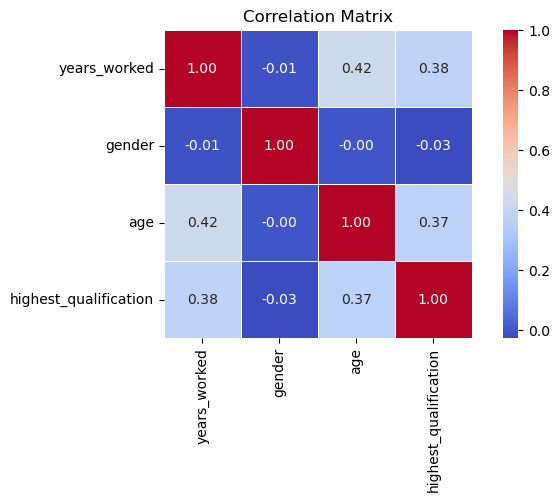

In [34]:
# Select the columns of interest
selected_columns = ['years_worked', 'gender', 'age', 'highest_qualification']

# Create a correlation matrix
correlation_matrix = quantdf[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Create a heatmap with a color spectrum
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, square=True)

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

- The Pearson correlation values of 0.42 (years_worked vs age) and 0.38 (years_worked vs highest_qualification) show that there is a significant positive correlation between years_worked and age and years_worked and highest_qualification. According to Mwila (2023), this may be the result of the respondents' aging with time and their increasing years of employment.  Additionally, there is a tendency toward a higher degree of qualification as the number of years employed rises. 

#### Correlation between years_worked and other variables (Full Matrix)

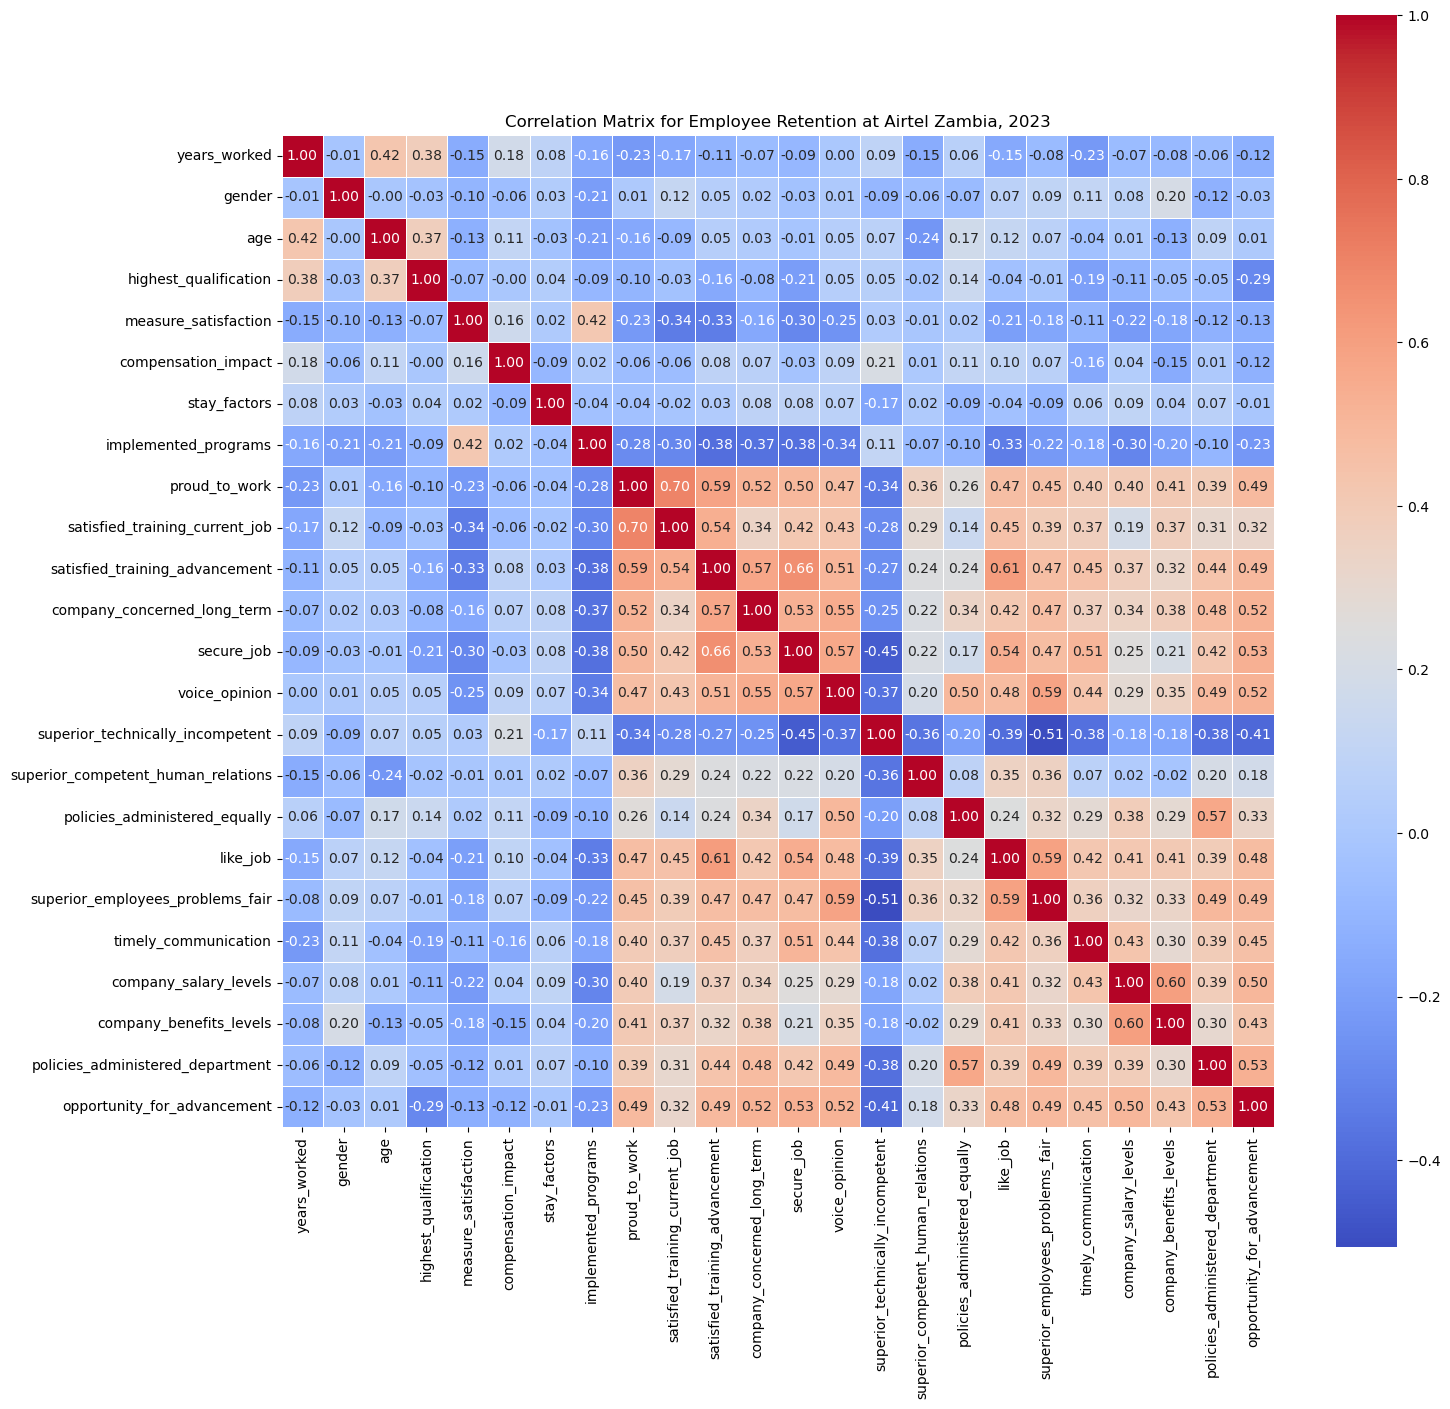

In [35]:
# Calculate the correlation matrix
corr = quantdf.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 16))

# Create a heatmap with a color spectrum
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, square=True)

# Add a title
plt.title('Correlation Matrix for Employee Retention at Airtel Zambia, 2023')

# Show the plot
plt.show()

#### Primary Causes Of Staff Turnover at Airtel Networks Zambia

#### Compensation and Employee Turnover

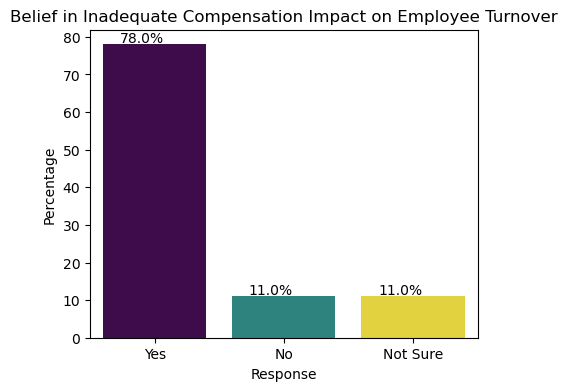

In [36]:
# Calculate percentage values
compensation_impact_percentages = quantdf['compensation_impact'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(5, 4))
bars = sns.barplot(x=compensation_impact_percentages.index, y=compensation_impact_percentages.values, hue=compensation_impact_percentages.index, palette="viridis", legend=False)

# Annotate each bar with the exact percentage value
for bar, percentage in zip(bars.patches, compensation_impact_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, f'{percentage:.1f}%', ha='center', color='black', fontsize=10)

# Set x-axis ticks and labels
bars.set_xticks(range(len(compensation_impact_percentages.index)))
bars.set_xticklabels(['Yes', 'No', 'Not Sure'])

plt.title('Belief in Inadequate Compensation Impact on Employee Turnover')
plt.xlabel('Response')
plt.ylabel('Percentage')
plt.show()

Insufficient remuneration, according to 78% of workers, is a major factor in job turnover. Of the employees, 22% were not sure or did not know if low pay has a major role in increasing employee turnover.

#### Other Factors Affecting Employee Turnover

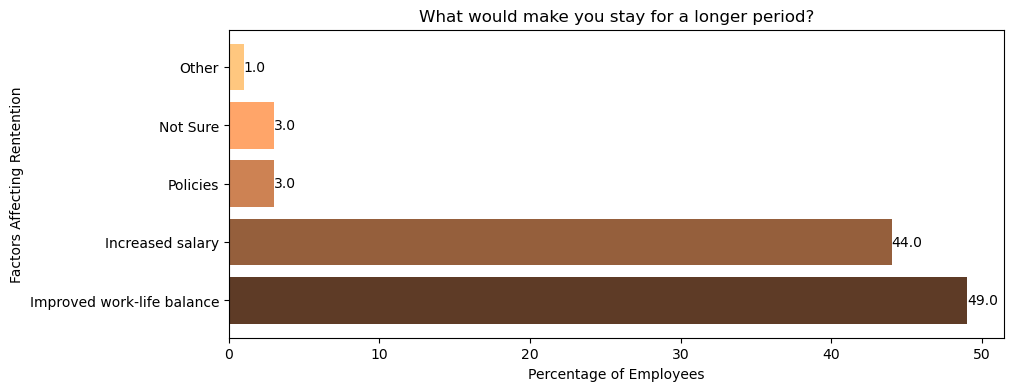

In [37]:
stay_factors_labels = {
    1: "Increased salary",
    2: "Policies",
    3: "Improved work-life balance",
    4: "Not Sure",
    5: "Other"
}

stay_factors_perct = quantdf['stay_factors'].value_counts(normalize=True) * 100

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Replacing numeric labels with descriptive strings
y = [stay_factors_labels[factor] for factor in stay_factors_perct.index]

x = stay_factors_perct.values

# Defining shades of brown from light to dark
colors = plt.cm.copper(np.linspace(0.3, 1, len(y)))

plt.barh(y, x, color=colors)

# Adding actual values at the tip of each bar
for index, value in enumerate(x):
    plt.text(value, index, f'{value:.1f}', va='center')

# Setting label of y-axis
plt.ylabel("Factors Affecting Rentention")

# Setting label of x-axis
plt.xlabel("Percentage of Employees") 
plt.title("What would make you stay for a longer period?")
plt.show()

When asked what would persuade them to stay longer, 44% of workers stated that a raise in pay and 49% that a better work-life balance would persuade them to stay longer.

#### Relationship between age vs years_worked

In [38]:
quantdfcat.isnull().sum()

years_worked                          0
gender                                0
age                                   0
highest_qualification                 0
measure_satisfaction                  0
compensation_impact                   0
stay_factors                          0
implemented_programs                  0
proud_to_work                         0
satisfied_training_current_job        0
satisfied_training_advancement        0
company_concerned_long_term           0
secure_job                            0
voice_opinion                         0
superior_technically_incompetent      0
superior_competent_human_relations    0
policies_administered_equally         0
like_job                              0
superior_employees_problems_fair      0
timely_communication                  0
company_salary_levels                 0
company_benefits_levels               0
policies_administered_department      0
opportunity_for_advancement           0
dtype: int64

In [39]:
cross = pd.crosstab(quantdfcat["age"], quantdfcat["years_worked"], rownames=["age"], colnames=["years_worked"])

# Rearrange columns
cross = cross[['< 1 years', '1 - 2 years', '2 - 3 years', '4 - 5 years', '> 5 years']]

# Total column
cross['Total'] = cross.sum(axis=1)

# Remove 'Total' column for chi-square calculation
cross_without_total = cross.drop(columns='Total')

# Expected counts
chi2, p, dof, expected = stats.chi2_contingency(cross_without_total)

# Pearson Chi-square and p-value
pearson_chi2 = chi2
pearson_p_value = '{:.2f}'.format(p)

# Likelihood Ratio
G2 = 2 * (cross_without_total * np.log(cross_without_total / expected)).sum().sum()

# Likelihood Ratio p-value
lr_p_value = 1 - stats.chi2.cdf(G2, dof)
lr_p_value = '{:.2f}'.format(lr_p_value)

# Number of cells with an expected count less than 5
less_than_5_count = (expected < 5).sum()
# Percentage of cells with an expected count less than 5
less_than_5_percentage = less_than_5_count / cross_without_total.size * 100

# Table and stats
print("Crosstab:")
display(cross)
print("\nChi-square Test Results:")
print(f"Pearson Chi-square: {pearson_chi2}")
print(f"P-value of Pearson Chi-square: {pearson_p_value}")
print(f"Likelihood Ratio: {G2}")
print(f"P-value of Likelihood Ratio: {lr_p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"The percentage number of cells with an expected count less than 5: {less_than_5_percentage}%")

Crosstab:


years_worked,< 1 years,1 - 2 years,2 - 3 years,4 - 5 years,> 5 years,Total
age,,,,,,
18 - 23 years,3,0,0,0,0,3
24 - 29 years,8,10,9,7,6,40
30 - 35 years,1,3,14,10,4,32
36 - 40 years,4,1,4,3,5,17
> 41 years,0,0,0,0,8,8



Chi-square Test Results:
Pearson Chi-square: 60.44541483562024
P-value of Pearson Chi-square: 0.00
Likelihood Ratio: 53.24443239204012
P-value of Likelihood Ratio: 0.00
Degrees of Freedom: 16
The percentage number of cells with an expected count less than 5: 64.0%


- For the Pearson Chi-Square and p-value to be used Chi-square assumes that at most 20% of the cells have an expected count less than 5. If not then the Likelihood Ratio is used to judge the association between variables.
- Between the age groups and years_worked, the percentage number of cells with an expected count less than 5 was 64%. Since the percentage was greater than 20%, the Likelihood Ratio (53.24) was used. The p-value (0.00) of the Likelihood Ratio was less than 0.05 so the null hypothesis that age is not associated with the years worked was rejected. Hence, the age and years worked were found to have a significant association, corresponding with the findings by Mwila (2023).

#### Relationship between age and an employee liking their job

In [40]:
cross2 = pd.crosstab(quantdfcat["age"], quantdfcat["compensation_impact"], rownames=["age"], colnames=["compensation_impact"])

# Total column
cross2['Total'] = cross2.sum(axis=1)

# Remove 'Total' column for chi-square calculation
cross2_without_total = cross2.drop(columns='Total')

# Expected counts
chi2_2, p2, dof2, expected2 = stats.chi2_contingency(cross2_without_total)

# Pearson Chi-square and p-value
pearson_chi2_2 = chi2_2
pearson_p_value_2 = '{:.2f}'.format(p2)

# Likelihood Ratio
G2_2 = 2 * (cross2_without_total * np.log(cross2_without_total / expected2)).sum().sum()

# Likelihood Ratio p-value
lr_p_value_2 = 1 - stats.chi2.cdf(G2_2, dof2)
lr_p_value_2 = '{:.2f}'.format(lr_p_value_2)

# Number of cells with an expected count less than 5
less_than_5_count_2 = (expected2 < 5).sum()
# Percentage of cells with an expected count less than 5
less_than_5_percentage_2 = less_than_5_count_2 / cross2_without_total.size * 100

# Table and stats
print("Crosstab:")
display(cross2)
print("\nChi-square Test Results:")
print(f"Pearson Chi-square: {pearson_chi2_2}")
print(f"P-value of Pearson Chi-square: {pearson_p_value_2}")
print(f"Likelihood Ratio: {G2_2}")
print(f"P-value of Likelihood Ratio: {lr_p_value_2}")
print(f"Degrees of Freedom: {dof2}")
print(f"The percentage number of cells with an expected count less than 5: {less_than_5_percentage_2}%")

Crosstab:


compensation_impact,No,Not sure,Yes,Total
age,,,,
18 - 23 years,0,1,2,3
24 - 29 years,4,4,32,40
30 - 35 years,6,0,26,32
36 - 40 years,1,3,13,17
> 41 years,0,3,5,8



Chi-square Test Results:
Pearson Chi-square: 14.469925499337267
P-value of Pearson Chi-square: 0.07
Likelihood Ratio: 16.41956179537142
P-value of Likelihood Ratio: 0.04
Degrees of Freedom: 8
The percentage number of cells with an expected count less than 5: 73.33333333333333%


- The Pearson Chi-square value was 14.47 with a corresponding p-value of approximately 0.07, suggesting a moderate association. However, when considering the percentage of cells with expected counts less than 5, which was notably high at 73.33%, it indicated potential limitations of the chi-square test.
- Therefore, the Likelihood Ratio, which yielded a value of 16.42 with a p-value of about 0.04 was used. This lower p-value (less than 0.05) indicated a significant association between age and job satisfaction. The null hypothesis was rejected and conclusion was made that there was indeed a significant relationship between age and an employee's job satisfaction. These findings align with the results by Mwila (2023).

#### Relationship between age and opportunity for advancement

In [41]:
cross3 = pd.crosstab(quantdfcat["age"], quantdfcat["opportunity_for_advancement"], rownames=["age"], colnames=["opportunity_for_advancement"])

# Total column
cross3['Total'] = cross3.sum(axis=1)

# Remove 'Total' column for chi-square calculation
cross3_without_total = cross3.drop(columns='Total')

# Expected counts
chi2_3, p3, dof3, expected3 = stats.chi2_contingency(cross3_without_total)

# Pearson Chi-square and p-value
pearson_chi2_3 = chi2_3
pearson_p_value_3 = '{:.2f}'.format(p3)

# Likelihood Ratio
G2_3 = 2 * (cross3_without_total * np.log(cross3_without_total / expected3)).sum().sum()

# Likelihood Ratio p-value
lr_p_value_3 = 1 - stats.chi2.cdf(G2_3, dof3)
lr_p_value_3 = '{:.2f}'.format(lr_p_value_3)

# Number of cells with an expected count less than 5
less_than_5_count_3 = (expected3 < 5).sum()
# Percentage of cells with an expected count less than 5
less_than_5_percentage_3 = less_than_5_count_3 / cross3_without_total.size * 100

# Table and stats
print("Crosstab:")
display(cross3)
print("\nChi-square Test Results:")
print(f"Pearson Chi-square: {pearson_chi2_3}")
print(f"P-value of Pearson Chi-square: {pearson_p_value_3}")
print(f"Likelihood Ratio: {G2_3}")
print(f"P-value of Likelihood Ratio: {lr_p_value_3}")
print(f"Degrees of Freedom: {dof3}")
print(f"The percentage number of cells with an expected count less than 5: {less_than_5_percentage_3}%")

Crosstab:


opportunity_for_advancement,Agree,Disagree,Neither agree nor disagree,Strongly Disagree,Strongly agree,Total
age,,,,,,
18 - 23 years,2,0,1,0,0,3
24 - 29 years,9,7,12,3,9,40
30 - 35 years,15,6,2,1,8,32
36 - 40 years,4,1,2,3,7,17
> 41 years,0,1,4,1,2,8



Chi-square Test Results:
Pearson Chi-square: 24.5041018009768
P-value of Pearson Chi-square: 0.08
Likelihood Ratio: 27.740640045489364
P-value of Likelihood Ratio: 0.03
Degrees of Freedom: 16
The percentage number of cells with an expected count less than 5: 68.0%


- The Pearson Chi-square value was 24.50 with a corresponding p-value of 0.08, indicating a notable but not statistically significant association. However, considering that 68.0% of the cells had expected counts less than 5, it raises concerns about the reliability of the chi-square test results.

- Therefore, the study turned to the Likelihood Ratio, which yielded a value of 27.74 with a p-value of 0.03. This lower p-value (less than 0.05) suggested a significant association between age and employees' perceptions of advancement opportunities at Airtel Zambia. As a result, the null hypothesis was rejected and the study concluded that age is significantly linked to how employees feel about advancement opportunities within the company (Mwila, 2023).

---------------- The End -------------------